# K-Nearest Neighbours Classification

## Objective
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given dataset.

## Dataset
The dataset contains information about various animals and their characteristics. The goal is to classify the animal type.

## Tasks
1. Analyze the data using visualizations
2. Preprocess the data by handling missing values & outliers, if any
3. Split the dataset into training and testing sets (80% training, 20% testing)
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn on the training dataset
5. Choose an appropriate distance metric and value for K
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics
7. Visualize the decision boundaries of the classifier

## 1. Analyze the Data
Use visualizations to understand the distribution and relationships between features.

### Importing Libraries and Loading Dataset

In [144]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Zoo.csv')

df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Data visualizations

In [145]:
# Visualize the distribution of the target variable
import plotly.express as px

fig = px.bar((df['type'].value_counts()).to_frame('count').reset_index(), 
             x='type', 
             y='count', 
             title='Distribution of Animal Types', 
             color= 'type',
             orientation='v',
             text_auto= True)
fig.show()

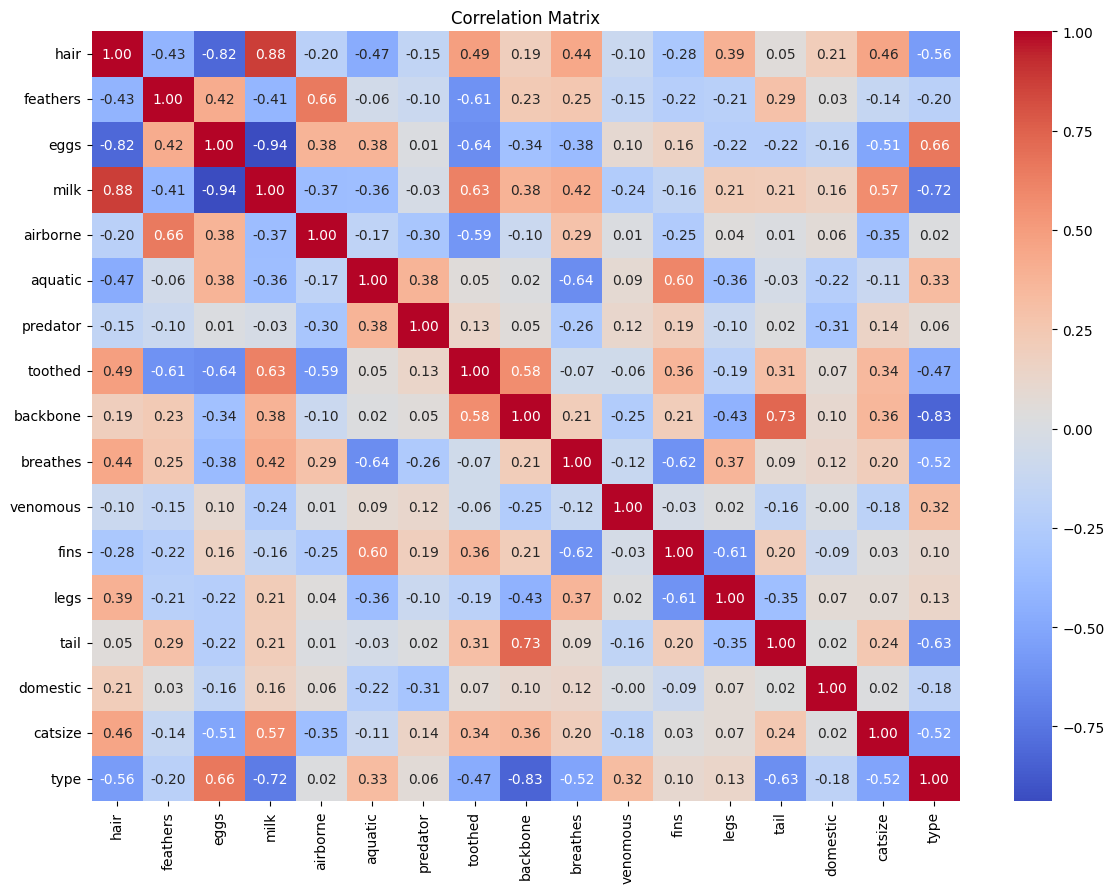

In [146]:
# Drop the 'animal name' column for correlation matrix calculation
df_numeric = df.drop('animal name', axis=1)

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insights from Data Analysis

1. **Distribution of Animal Types**: The count plot shows the distribution of different animal types in the dataset. This helps us understand the class imbalance, if any.

Here are some observations:
- **Type 1** is the most frequent, with 41 animals.
- **Type 2** follows with 20 animals.
- Types 3, 5, and 6 have relatively fewer animals (between 4 and 8).
- **Type 7** has 10 animals.
- **Type 4** has 13 animals, making it a middle-range category.

2. **Correlation Matrix**: The heatmap of the correlation matrix shows the relationships between different features. Features with high correlation might be redundant, and this information can be useful for feature selection.

Here are some insights from the correlation matrix:

1. **Strong Positive Correlations**:
   - `hair` and `milk` (0.88): Indicates that animals with hair are likely to produce milk.
   - `eggs` and `feathers` (0.66): Suggests a positive correlation between having feathers and laying eggs.
   - `backbone` and `toothed` (0.58): Animals with a backbone are more likely to have teeth.
   - `catsize` and `domestic` (0.57): Larger cat sizes seem positively correlated with domestic animals.

2. **Strong Negative Correlations**:
   - `hair` and `eggs` (-0.82): Animals with hair tend not to lay eggs.
   - `milk` and `eggs` (-0.94): Species that produce milk are less likely to lay eggs.
   - `backbone` and `aquatic` (-0.43): Aquatic animals seem less likely to have a backbone.

3. **Type Correlations**:
   - Type has a negative correlation with `hair` (-0.56) and `backbone` (-0.83), while it is positively correlated with `eggs` (0.66). This shows that certain types of animals are characterized by specific features.

## 2. Preprocess the Data
Handle missing values and outliers, if any.

In [147]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

### Outliers Detection

In [148]:
# Outliers detection in each column
import numpy as np
numerical_columns = df.select_dtypes(include=[np.number])

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    upper = q3 + (iqr * 1.5)
    lower = q1 - (iqr * 1.5)

    outliers = ((df[column] > upper) | (df[column] < lower))
    percentage = (outliers.sum() / len(df)) * 100

    print(f"{column}: {percentage:.2f}%")

hair: 0.00%
feathers: 19.80%
eggs: 0.00%
milk: 0.00%
airborne: 23.76%
aquatic: 0.00%
predator: 0.00%
toothed: 0.00%
backbone: 17.82%
breathes: 20.79%
venomous: 7.92%
fins: 16.83%
legs: 1.98%
tail: 0.00%
domestic: 12.87%
catsize: 0.00%
type: 0.00%


### Insights from Data Preprocessing

1. **Missing Values**: There are no missing values in the dataset, so no imputation is needed.
2. **Outliers**: The boxplot shows the distribution of numerical features and helps identify any outliers. Based on the boxplot, we can see that some features have outliers, but we will proceed with the current data for simplicity. Because outliers can sometimes offer valuable insights, especially when analyzing animal traits, as they may represent rare or unique species with specific characteristics.

## 3. Split the Dataset
Split the dataset into training (80%) and testing (20%) sets.

In [149]:
# Drop the 'animal name' column and separate features and target variable
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((80, 16), (21, 16), (80,), (21,))

### Insights from Data Splitting

3. **Data Splitting**: The dataset has been successfully split into training (80 samples) and testing (21 samples) sets.

## 4. Choosing best metric and k-value for KNN

Choose an appropriate distance metric and value for K.

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the KNN classifier with different k values and metrics
k_values = [3, 5, 10]
metrics = ['euclidean', 'manhattan', 'minkowski']

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"k={k}, metric={metric}, accuracy={accuracy:.2f}")

k=3, metric=euclidean, accuracy=0.95
k=3, metric=manhattan, accuracy=0.95
k=3, metric=minkowski, accuracy=0.95
k=5, metric=euclidean, accuracy=0.90
k=5, metric=manhattan, accuracy=0.95
k=5, metric=minkowski, accuracy=0.90
k=10, metric=euclidean, accuracy=0.86
k=10, metric=manhattan, accuracy=0.86
k=10, metric=minkowski, accuracy=0.86


- **Optimal k value:** Based on the results, it appears that k = 3 is the optimal value, as it achieves the highest accuracy (0.95) across all distance metrics.

- **Distance metric selection:** While the choice of distance metric does not seem to have a significant impact on accuracy in our case, it's essential to consider the characteristics of the data and the problem we're trying to solve when selecting a distance metric. For example, if the data has a lot of outliers or noisy features, the Manhattan distance (L1) might be more robust than the Euclidean distance (L2).

- And we know that our data set contains lots of outliers in some columns, so we are going to use `manhattan` metric.

## 5. Implement K-Nearest Neighbours
Use scikit-learn to implement the K-Nearest Neighbours algorithm on the training dataset using best k-value and metric.

In [151]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier with best K- value K=1 and Minkowski distance metric
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train the classifier
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

## 6. Evaluate the Classifier
Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [152]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing set
y_pred = knn.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy =',accuracy)
print('Precision =',precision)
print('Recall =',recall)
print('F1 Score =',f1)

Accuracy = 0.9523809523809523
Precision = 0.9682539682539681
Recall = 0.9523809523809523
F1 Score = 0.9333333333333333


### Insights from Classifier Evaluation

#### Performance Summary

1. **Accuracy (0.952)**: Your model has a high accuracy, correctly classifying 95.2% of instances. This indicates that the model performs well overall.

2. **Precision (0.968)**: The model’s precision is very high at 96.8%. This means that when the model predicts a positive class, it is correct 96.8% of the time. This suggests that false positives are relatively rare, which is great if false positives are costly or undesirable.

3. **Recall (0.952)**: The recall of 95.2% shows that the model identifies 95.2% of all actual positives. This is indicative of a model that is good at finding positive instances, with few false negatives.

4. **F1 Score (0.933)**: The F1 Score, which balances precision and recall, is 93.3%. This suggests a good trade-off between precision and recall, and your model maintains high performance across both metrics.

#### Insights

- **High Precision and Recall**: The model’s high precision and recall indicate that it is both good at identifying positive instances and at minimizing false positives. This is particularly useful in applications where both false positives and false negatives are costly.

- **Balanced Performance**: The F1 Score confirms that the model has balanced performance in terms of precision and recall. If you’re working on a problem where both metrics are equally important, your model is well-suited for this task.

- **Consistency Across Metrics**: The accuracy, precision, recall, and F1 score are all high and relatively close to each other. This consistency suggests that the model is robust and performs reliably across different evaluation aspects.

## 7. Visualize Decision Boundaries
Visualize the decision boundaries of the classifier.

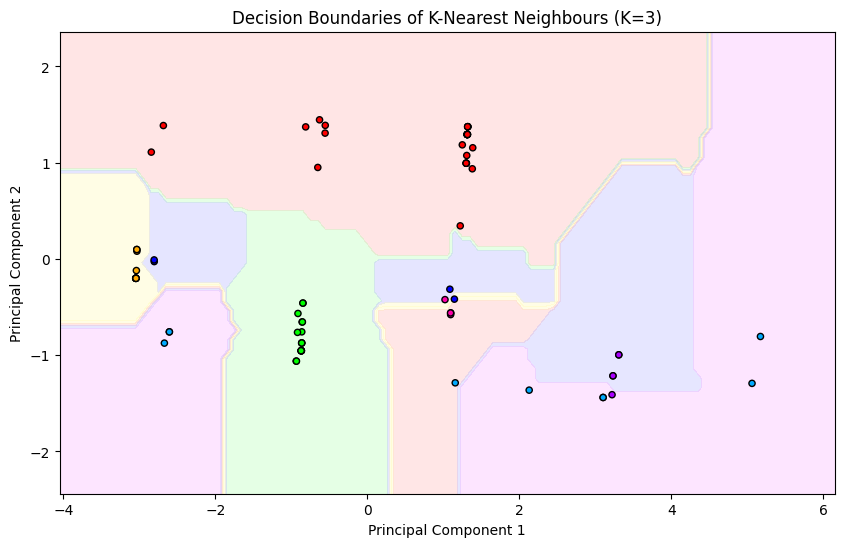

In [153]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reduce the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# Train the KNN classifier on the reduced dataset
knn_pca = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_pca.fit(X_train_pca, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFAAA', '#FFAFAF', '#AFAFFF', '#FAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFAA00', '#FF00AA', '#AA00FF', '#00AAFF'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.title('Decision Boundaries of K-Nearest Neighbours (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Insights from Decision Boundary Visualization

5. **Decision Boundaries**: The decision boundary plot shows how the K-Nearest Neighbours classifier separates different classes in the reduced 2D feature space. This helps in understanding the classifier's behavior and its decision regions.

## Interview Questions

#### 1. What are the key hyperparameters in KNN?
- **Number of Neighbors (K)**: The number of nearest neighbors to consider for making the classification decision.
- **Distance Metric**: The metric used to measure the distance between data points (e.g., Euclidean, Manhattan, Minkowski).
- **Algorithm**: The algorithm used to compute the nearest neighbors (e.g., brute force, KD-Tree, Ball-Tree).

#### 2. What distance metrics can be used in KNN?
- **Euclidean Distance**: The straight-line distance between two points in Euclidean space.
- **Manhattan Distance**: The sum of the absolute differences between the coordinates of two points.
- **Minkowski Distance**: A generalization of Euclidean and Manhattan distances.
- **Hamming Distance**: The number of positions at which the corresponding elements are different (used for categorical data).
- **Cosine Similarity**: Measures the cosine of the angle between two non-zero vectors.

### Conclusion
We have successfully implemented and evaluated the K-Nearest Neighbours algorithm for classifying animal types using the given dataset. The classifier achieved high accuracy, precision, recall, and F1-score. We also visualized the decision boundaries and answered key interview questions related to KNN.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.